In [4]:
%matplotlib inline
from fastai.learner import *

Lets take a look at Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will study the concepts with concrete examples

## Liner Regression Problem

The goal of Linear regression is to fit a line to a set of points

In [5]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n,a,b):
    x = s = np.random.uniform(0,1,n)
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x,y
x,y = gen_fake_data(50,3.,8.)

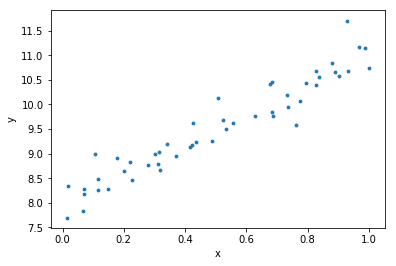

In [6]:
plt.scatter(x,y,s=8); plt.xlabel("x"); plt.ylabel("y");

You wnat to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a.x+b$. Note that here $a$ and $b$ are unknown.
For a regression problem the most common error function or loss function is the **mean squared error**

In [7]:
def mse(y_hat,y): return ((y_hat - y ) **2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute $y^$ which is our *prediction* and then compute our error.

In [8]:
y_hat = lin(10,5,x)
mse(y_hat,y)

4.779122590794983

In [9]:
def mse_loss(a,b,x,y): return mse(lin(a,b,x),y)

In [10]:
mse_loss(10,5,x,y)

4.779122590794983

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

## Gradient Descent

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [11]:
# generate some more data
x,y = gen_fake_data(10000,3.,8.)
x.shape,y.shape

((10000,), (10000,))

In [12]:
x,y = V(x), V(y)

In [13]:
#Create random weights a and b and wrap them in Variables to get gradient stored, Tensor does not store gradient
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)
a,b

(tensor([0.6813], device='cuda:0', requires_grad=True),
 tensor([0.0504], device='cuda:0', requires_grad=True))

In [26]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.data.item()) #print loss at times 1/10th
    
    # Computes the gradient of loss with respectd to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will eb Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients for next run. 
    # remember this is just GD not SGD which is in batches. 
    # This is run one at a time
    a.grad.data.zero_()
    b.grad.data.zero_()
        

0.0884564220905304
0.08833728730678558
0.08824538439512253
0.08817457407712936
0.0881199762225151
0.08807801455259323
0.08804550766944885
0.0880204439163208
0.08800137042999268
0.08798626810312271


Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seen as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

## Gradient Descent - Classification

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [14]:
def gen_fake_data2(n,a,b):
    x =s = np.random.uniform(0,1,n)
    y = lin (a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x,np.where(y>10,1,0).astype(np.float32)

In [15]:
x,y = gen_fake_data2(10000, 3., 8.)
x,y = V(x), V(y)

In [16]:
def nll(y_hat, y):
    y_hat = torch.clamp(y_hat, 1e-5, 1-1e-5)
    return (y*y_hat.log() + (1-y)*(1-y_hat).log()).mean() 

In [17]:
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)

In [18]:
learning_rate = 1e-2
for t in range(3000):
    p = (-lin(a,b,x)).exp()
    y_hat = 1/(1+p)
    loss = nll(y_hat,y)
    if t% 1000 == 0:
        print(loss.data.item(), np.mean(to_np(y)==(to_np(y_hat)>0.5)))
        #print(y_hat)
    loss.backward()
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    a.grad.data.zero_()
    b.grad.data.zero_()
    

-0.8659830093383789 0.3289
-5.166977405548096 0.3289
-7.6773505210876465 0.3289


Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

## Gradient Descent with numpy

In [19]:
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation',html='html5')
rcParams['figure.figsize'] = 3,3

In [20]:
x,y = gen_fake_data(50,3.,8.)

In [21]:
a_guess, b_guess = -1., 1.
mse_loss(a_guess, b_guess, x, y)

83.56084801929832

In [22]:
lr = 0.01
def upd():
    global a_guess, b_guess
    y_pred =  lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [23]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(30): upd()
    return line, 

ani = animation.FuncAnimation(fig, animate, np.arange(0,20), interval=100)
ani